In [2]:
import random
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import minmax_scale
import matplotlib.pyplot as plt
from network import NeuralNetwork

## useful functions

In [ ]:
def plots(loss_fun: str, limit=False):
    plt.figure(figsize=(7.5,4))
    if limit:
        axes = plt.gca()
        axes.set_ylim([0.6,0.75])
    plt.plot(x_epochs, y_train, label='Training')
    plt.plot(x_epochs, y_eval, label='Validation')

    plt.xlabel('Epochs')
    plt.ylabel(loss_fun)

    plt.title("Plot of '{}' over training and validation data".format(loss_fun))

    plt.legend()
    plt.savefig('fig1.png', dpi = 300)
    plt.show()

## Load data

In [18]:
df = pd.read_excel('HW3train.xlsx')
x0 = minmax_scale(df['X_0'].tolist())
x1 = minmax_scale(df['X_1'].tolist())
y = df['y'].tolist()
training_sets = []
for i in range(len(x0)):
    training_sets.append([[x0[i],x1[i]],[y[i]]])

df = pd.read_excel('HW3validate.xlsx')
x0 = minmax_scale(df['X_0'].tolist())
x1 = minmax_scale(df['X_1'].tolist())
y = df['y'].tolist()
validation_sets = []
for i in range(len(x0)):
    validation_sets.append([[x0[i],x1[i]],[y[i]]])

## Part I, II (until 5)

In [ ]:
y_train = []
y_eval = []
x_epochs = []
params = [0.25, "cross", "leaky", "leaky", "sigmoid"]

nn = NeuralNetwork(2, 10, 10, 1, learning_rate=params[0], loss_function=params[1], hidden_layer_1_activation=params[2], hidden_layer_2_activation=params[3], output_layer_activation=params[4])
prev_error = 2
error = 1
iteration = 0
epochs = 0
BATCH_SIZE = 32

if BATCH_SIZE > 0:
    while epochs < 30:
        nn.train(training_sets[BATCH_SIZE*iteration:BATCH_SIZE+BATCH_SIZE*iteration])
        y_train.append(nn.calculate_total_error(training_sets))
        y_eval.append(nn.calculate_total_error(validation_sets))
        x_epochs.append(epochs)
        iteration += 1
        if iteration % (math.ceil(len(training_sets) / BATCH_SIZE)) == 0:
            iteration = 0
            epochs += 1
#             plots("cross")
        if nn.calculate_total_error(training_sets) < 0.15:
            break
else:
    while True:
        nn.train(training_sets)
        error = nn.calculate_total_error(training_sets)
        y_train.append(error)
        y_eval.append(nn.calculate_total_error(validation_sets))
        x_epochs.append(iteration)
        iteration += 1
        epochs += 1
        if iteration == 500:
            break
        if error < 0.15:
            break
plots("Cross-Entropy", limit=False)
nn.undo()

print("Configuration: {}, {}, {}, {}, {}, {}".format(params[0], params[1],params[2],params[3],params[4], BATCH_SIZE))
print("Validation set total error: ", nn.calculate_total_error(validation_sets))
print("Training set total error: ", nn.calculate_total_error(training_sets))
# nn.print_expected_predicted(validation_sets)
print("True positives:",nn.true_positive(validation_sets))
print("True negatives:",nn.true_negative(validation_sets))
print("False positives:",nn.false_positive(validation_sets))
print("False negatives:",nn.false_negative(validation_sets))
print("Count correct:",nn.count_correct(validation_sets))
print("Num epochs:", epochs)

## Ex 8

In [35]:
funs = ["leaky", "sigmoid", "elu", "relu"]
dic = {"leaky": 0, "sigmoid": 1, "elu": 2, "relu": 3}
N = 5

params = {(random.randint(2,20), random.randint(2,20), random.uniform(0, 1), random.choice(funs), random.choice(funs), "sigmoid",random.randint(1,64)) for i in range(N)}


data = {
    "n_neurons_h1": [],
    "n_neurons_h2": [],
    "learning_rate": [],
    "act_fun_h1": [],
    "act_fun_h2": [],
    "batch_size": [],
    "accuracy": []
}

for p in params:
    print("Configuration:", p)
    nn = NeuralNetwork(2, p[0], p[1], 1, learning_rate=p[2], loss_function="cross", hidden_layer_1_activation=p[3], hidden_layer_2_activation=p[4], output_layer_activation=p[5])
    iteration = 0
    epochs = 0
    BATCH_SIZE = p[6]


    while epochs < 30:
        nn.train(training_sets[BATCH_SIZE*iteration:BATCH_SIZE+BATCH_SIZE*iteration])
        iteration += 1
        if iteration % (math.ceil(len(training_sets) / BATCH_SIZE)) == 0:
            iteration = 0
            epochs += 1
        if nn.calculate_total_error(validation_sets) < 0.150:
            break
    
    data["n_neurons_h1"].append(p[0])
    data["n_neurons_h2"].append(p[1])
    data["learning_rate"].append(p[2])
    data["act_fun_h1"].append(dic[p[3]])
    data["act_fun_h2"].append(dic[p[4]])
    data["batch_size"].append(p[6])
    data["accuracy"].append(nn.count_correct(validation_sets)/82)
    
#     print("Validation set total error: ", nn.calculate_total_error(validation_sets))
#     print("Training set total error: ", nn.calculate_total_error(training_sets))
# #     nn.print_expected_predicted(validation_sets)
#     print("True positives:",nn.true_positive(validation_sets))
#     print("True negatives:",nn.true_negative(validation_sets))
#     print("False positives:",nn.false_positive(validation_sets))
#     print("False negatives:",nn.false_negative(validation_sets))
#     print("Count correct:",nn.count_correct(validation_sets))
#     print("Num epochs:", epochs)
#     print("")

Configuration: (7, 17, 0.6939285383457179, 'sigmoid', 'relu', 'sigmoid', 21)
Configuration: (20, 9, 0.26877824279658524, 'elu', 'relu', 'sigmoid', 15)
Configuration: (11, 2, 0.08293853129006945, 'elu', 'leaky', 'sigmoid', 44)
Configuration: (17, 17, 0.7090980780590356, 'sigmoid', 'elu', 'sigmoid', 48)
Configuration: (3, 5, 0.17264857610634743, 'relu', 'leaky', 'sigmoid', 23)


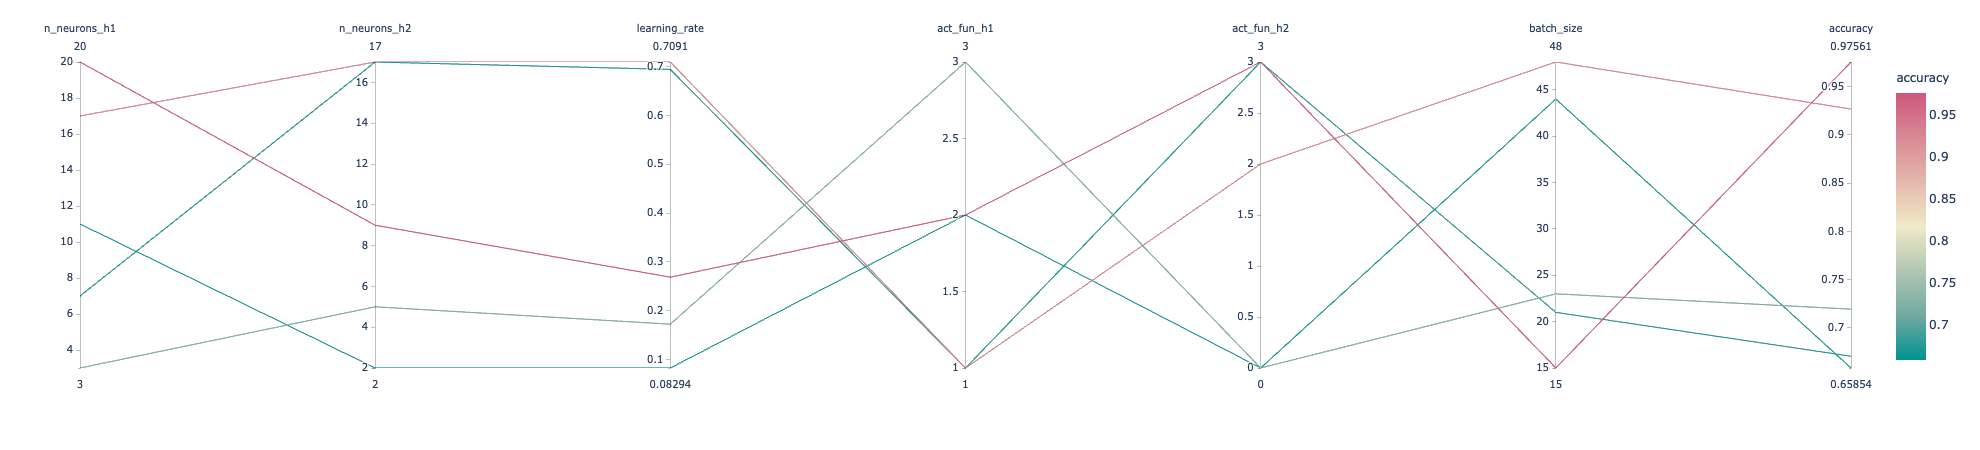

In [38]:
import plotly.express as px
df = pd.DataFrame(data)
fig = px.parallel_coordinates(df, color="accuracy",
#                               dimensions=['n_neurons_h1', 'n_neurons_h2', 'learning_rate', 'batch_size'],
                             color_continuous_scale=px.colors.diverging.Tealrose)
fig.show()